# This notebook checks the assumptions of the 6 data simulations.

### For each simulation, looks at 2 randomly chosen samples (of the 30 generated).
### For each sample, looks at 5 randomly chosen features (of the 20 generated).
### Results are for datasets with training set size of 30,000 and test set size of 10,000.

#### Alene Rhea, April 16, 2021

In [1]:
import pandas as pd
import pathlib, os, pickle
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
import random

In [2]:
base_repo_dir = pathlib.Path(os.getcwd())

# Set random state
random.seed(42)

# Set number of samples and number of features to test
n_samps = 2
n_xfeats = 5

# Function to get y0 and y1
def get_potential_outcomes(df):
    
    # Initialize y0 and y1
    df['y0'] = np.nan
    df['y1'] = np.nan
    
    # Get observbed outcomes
    df.loc[df.treatment==0, 'y0'] = df.loc[df.treatment==0, 'Y']
    df.loc[df.treatment==1, 'y1'] = df.loc[df.treatment==1, 'Y']
    
    # Get unobserved outcomes
    df.loc[df.treatment==0, 'y1'] = df.loc[df.treatment==0, 'y0'] + df.loc[df.treatment==0, 'tau']
    df.loc[df.treatment==1, 'y0'] = df.loc[df.treatment==1, 'y1'] - df.loc[df.treatment==1, 'tau']
    
    return df

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Sim A


Testing Sample 21 of Simulation A
Visually check that x1, x9, x8, x18, and x5 are approximately normal...


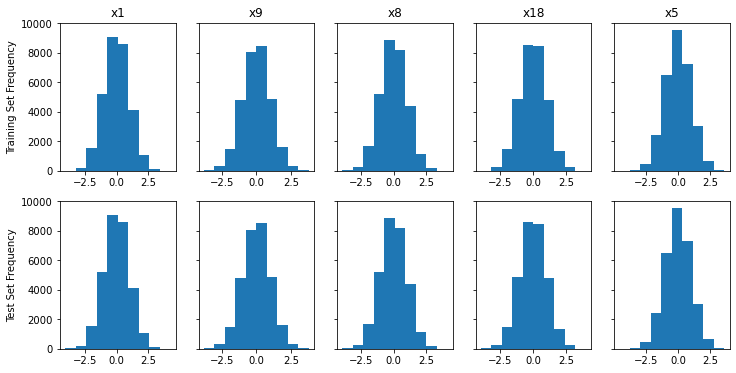

All propensity scores are 0.01? True
Proportion of training set with treatment=1 (should be close to 0.01):  0.0103
Proportion of test set with treatment=1 (should be close to 0.01):  0.0098
For training set, E[Y0 | x1 > 0.5 ] - E[Y0 | x1 <= 0.5 ] (should be about 5):  8.8088
For test set, E[Y0 | x1 > 0.5 ] - E[Y0 | x1 <= 0.5 ] (should be about 5):  7.8597
Wherever x2>0.1, tau=8?  True
Wherever x2<=0.1, tau=0?  True

Testing Sample 4 of Simulation A
Visually check that x4, x18, x3, x14, and x2 are approximately normal...


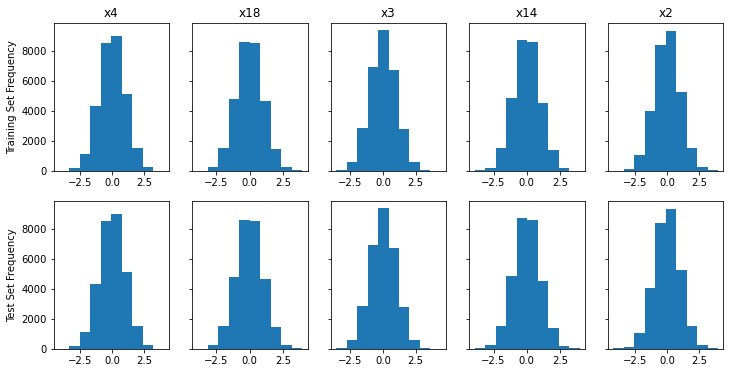

All propensity scores are 0.01? True
Proportion of training set with treatment=1 (should be close to 0.01):  0.0089
Proportion of test set with treatment=1 (should be close to 0.01):  0.0098
For training set, E[Y0 | x1 > 0.5 ] - E[Y0 | x1 <= 0.5 ] (should be about 5):  12.5277
For test set, E[Y0 | x1 > 0.5 ] - E[Y0 | x1 <= 0.5 ] (should be about 5):  10.9745
Wherever x2>0.1, tau=8?  True
Wherever x2<=0.1, tau=0?  True


In [4]:
# Choose 2 samples of simA to test
Asamps = random.sample(list(np.arange(1,31,1)), n_samps)

for samp in Asamps:
    print('\nTesting Sample {} of Simulation A'.format(samp))
    
    # Read in test and train
    tr = pd.read_parquet(base_repo_dir / 'data' / 'simA' / 'samp{}_train.parquet'.format(samp))
    te = pd.read_parquet(base_repo_dir / 'data' / 'simA' / 'samp{}_test.parquet'.format(samp))

    #Choose 5 X features to test
    xfeats = random.sample(list(np.arange(1,21,1)), n_xfeats)
    print('Visually check that x{}, x{}, x{}, x{}, and x{} are approximately normal...'.format(*xfeats))
    
    fig, ax = plt.subplots(2,n_xfeats, figsize=(12,6), sharey=True)
    for i, x in enumerate(xfeats):
        ax[0][i].hist(tr['x'+str(x)])
        ax[1][i].hist(tr['x'+str(x)])
        ax[0][i].set_title('x'+str(x))
    ax[0][0].set_ylabel('Training Set Frequency')
    ax[1][0].set_ylabel('Test Set Frequency')
    plt.show()
    
    print('All propensity scores are 0.01?', (all(tr.pscore==.01)&all(te.pscore==.01)))
    print('Proportion of training set with treatment=1 (should be close to 0.01): ', 
          round(sum(tr.treatment==1)/len(tr), 4))
    print('Proportion of test set with treatment=1 (should be close to 0.01): ', 
          round(sum(te.treatment==1)/len(te), 4))

    # Get potential outcomes
    tr = get_potential_outcomes(tr)
    te = get_potential_outcomes(te)
    
    print('For training set, E[Y0 | x1 > 0.5 ] - E[Y0 | x1 <= 0.5 ] (should be about 5): ',
          round(np.mean(tr[tr.x1>0.5]['y0']) - np.mean(tr[tr.x1<=0.5]['y0']), 4))
    
    print('For test set, E[Y0 | x1 > 0.5 ] - E[Y0 | x1 <= 0.5 ] (should be about 5): ',
          round(np.mean(te[te.x1>0.5]['y0']) - np.mean(te[te.x1<=0.5]['y0']), 4))
    
    print('Wherever x2>0.1, tau=8? ', all(np.isclose(tr[tr.x2>0.1]['tau'],8)) \
                                    & all(np.isclose(te[te.x2>0.1]['tau'],8)))
    print('Wherever x2<=0.1, tau=0? ', all(np.isclose(tr[tr.x2<=0.1]['tau'],0)) \
                                    & all(np.isclose(te[te.x2<=0.1]['tau'],0)))
    

#### Difference in Mean y0 (conditioned on x1) is questionable. All other checks passed. 

## Sim B


Testing Sample 1 of Simulation B
Visually check that x7, x8, x17, x1, and x20 are approximately normal...


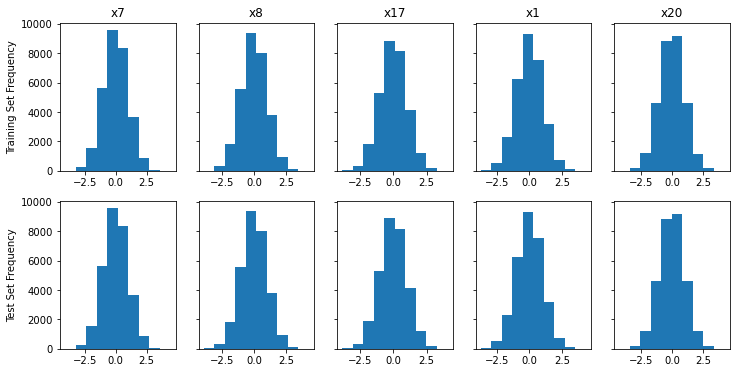

All propensity scores are 0.5? True
Proportion of training set with treatment=1 (should be close to 0.5):  0.4976
Proportion of test set with treatment=1 (should be close to 0.5):  0.4926

Testing Sample 3 of Simulation B
Visually check that x18, x14, x8, x15, and x9 are approximately normal...


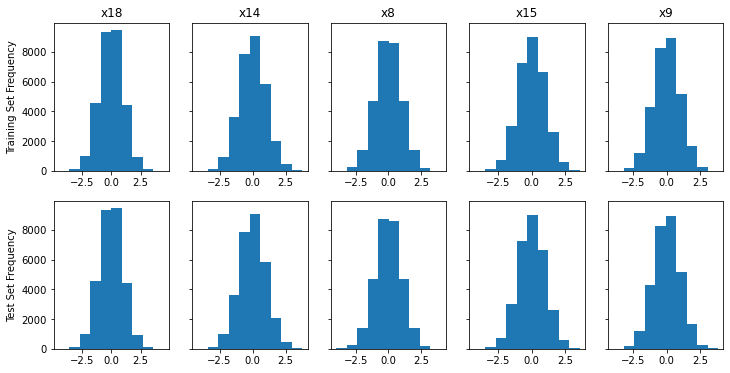

All propensity scores are 0.5? True
Proportion of training set with treatment=1 (should be close to 0.5):  0.4997
Proportion of test set with treatment=1 (should be close to 0.5):  0.494


In [5]:
# Choose 2 samples of simB to test
Bsamps = random.sample(list(np.arange(1,31,1)), n_samps)

for samp in Bsamps:
    print('\nTesting Sample {} of Simulation B'.format(samp))
    
    # Read in test and train
    tr = pd.read_parquet(base_repo_dir / 'data' / 'simB' / 'samp{}_train.parquet'.format(samp))
    te = pd.read_parquet(base_repo_dir / 'data' / 'simB' / 'samp{}_test.parquet'.format(samp))

    #Choose 5 X features to test
    xfeats = random.sample(list(np.arange(1,21,1)), n_xfeats)
    print('Visually check that x{}, x{}, x{}, x{}, and x{} are approximately normal...'.format(*xfeats))
    
    fig, ax = plt.subplots(2,n_xfeats, figsize=(12,6), sharey=True)
    for i, x in enumerate(xfeats):
        ax[0][i].hist(tr['x'+str(x)])
        ax[1][i].hist(tr['x'+str(x)])
        ax[0][i].set_title('x'+str(x))
    ax[0][0].set_ylabel('Training Set Frequency')
    ax[1][0].set_ylabel('Test Set Frequency')
    plt.show()
    
    print('All propensity scores are 0.5?', (all(tr.pscore==.5)&all(te.pscore==.5)))
    print('Proportion of training set with treatment=1 (should be close to 0.5): ', 
          round(sum(tr.treatment==1)/len(tr), 4))
    print('Proportion of test set with treatment=1 (should be close to 0.5): ', 
          round(sum(te.treatment==1)/len(te), 4))


#### All checks passed.

## Sim C


Testing Sample 26 of Simulation C
Visually check that x1, x6, x14, x11, and x9 are approximately normal...


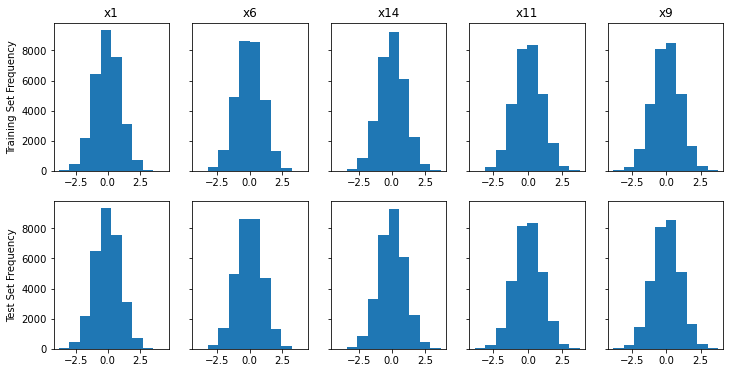

All propensity scores are 0.5? True
Proportion of training set with treatment=1 (should be close to 0.5):  0.4979
Proportion of test set with treatment=1 (should be close to 0.5):  0.4972
Trainig set Y0 is product of transformed x1 and x2? False
Test set Y0 is product of transformed x1 and x2? False
Trainig set Y1 is product of transformed x1 and x2? False
Test set Y1 is product of transformed x1 and x2? False

Testing Sample 28 of Simulation C
Visually check that x5, x7, x11, x4, and x3 are approximately normal...


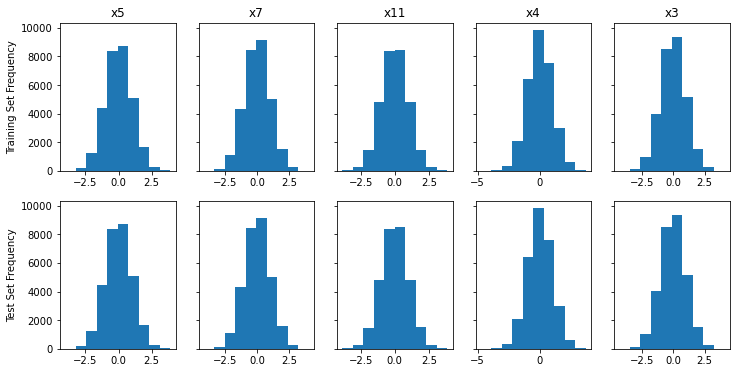

All propensity scores are 0.5? True
Proportion of training set with treatment=1 (should be close to 0.5):  0.5042
Proportion of test set with treatment=1 (should be close to 0.5):  0.4924
Trainig set Y0 is product of transformed x1 and x2? False
Test set Y0 is product of transformed x1 and x2? False
Trainig set Y1 is product of transformed x1 and x2? False
Test set Y1 is product of transformed x1 and x2? False


In [6]:
# Choose 2 samples of simC to test
Csamps = random.sample(list(np.arange(1,31,1)), n_samps)

# Complex non-linear transformation function from SI 3
def simC_transform(x):
    x = x.values
    return 2/( 1 + np.exp(-12*(x - 0.5)))

for samp in Csamps:
    print('\nTesting Sample {} of Simulation C'.format(samp))
    
    # Read in test and train
    tr = pd.read_parquet(base_repo_dir / 'data' / 'simC' / 'samp{}_train.parquet'.format(samp))
    te = pd.read_parquet(base_repo_dir / 'data' / 'simC' / 'samp{}_test.parquet'.format(samp))

    #Choose 5 X features to test
    xfeats = random.sample(list(np.arange(1,21,1)), n_xfeats)
    print('Visually check that x{}, x{}, x{}, x{}, and x{} are approximately normal...'.format(*xfeats))
    
    fig, ax = plt.subplots(2,n_xfeats, figsize=(12,6), sharey=True)
    for i, x in enumerate(xfeats):
        ax[0][i].hist(tr['x'+str(x)])
        ax[1][i].hist(tr['x'+str(x)])
        ax[0][i].set_title('x'+str(x))
    ax[0][0].set_ylabel('Training Set Frequency')
    ax[1][0].set_ylabel('Test Set Frequency')
    plt.show()
    
    print('All propensity scores are 0.5?', (all(tr.pscore==.5)&all(te.pscore==.5)))
    print('Proportion of training set with treatment=1 (should be close to 0.5): ', 
          round(sum(tr.treatment==1)/len(tr), 4))
    print('Proportion of test set with treatment=1 (should be close to 0.5): ', 
          round(sum(te.treatment==1)/len(te), 4))
    
    # Get potential outcomes
    tr = get_potential_outcomes(tr)
    te = get_potential_outcomes(te)
    
    print('Trainig set Y0 is product of transformed x1 and x2?', 
          all(np.isclose(tr.y0, -0.5*simC_transform(tr.x1)*simC_transform(tr.x2))))
    print('Test set Y0 is product of transformed x1 and x2?', 
          all(np.isclose(te.y0, -0.5*simC_transform(te.x1)*simC_transform(te.x2))))
    print('Trainig set Y1 is product of transformed x1 and x2?', 
          all(np.isclose(tr.y1, 0.5*simC_transform(tr.x1)*simC_transform(tr.x2))))
    print('Test set Y1 is product of transformed x1 and x2?', 
          all(np.isclose(te.y1, 0.5*simC_transform(te.x1)*simC_transform(te.x2))))


#### Failed to confirm that potential outcomes are products of non-linear transformations of x1 and x2. All other checks passed.

## Sim D


Testing Sample 13 of Simulation D
Visually check that x12, x20, x9, x2, and x15 are approximately uniform...


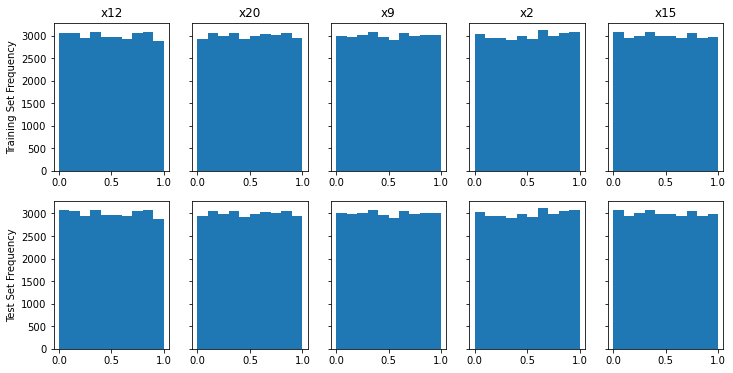

Training Set Feature Correlation Matrix (should be 1 along diagonal, and close to 0 elsewhere)


,x12,x20,x9,x2,x15
x12,1.000000,-0.000907,-0.001398,0.002777,-0.007353
x20,-0.000907,1.000000,0.001726,0.000695,0.003062
x9,-0.001398,0.001726,1.000000,0.003183,-0.000870
x2,0.002777,0.000695,0.003183,1.000000,-0.008121
x15,-0.007353,0.003062,-0.000870,-0.008121,1.000000



Test Set Feature Correlation Matrix (should be 1 along diagonal, and close to 0 elsewhere)


,x12,x20,x9,x2,x15
x12,1.000000,0.003591,-0.008329,0.006121,-0.003521
x20,0.003591,1.000000,-0.012906,0.001518,-0.007258
x9,-0.008329,-0.012906,1.000000,-0.004682,0.003626
x2,0.006121,0.001518,-0.004682,1.000000,-0.012806
x15,-0.003521,-0.007258,0.003626,-0.012806,1.000000


Y0 = 2*x1-1?  False
All tau are 0? True

Testing Sample 4 of Simulation D
Visually check that x18, x4, x13, x3, and x10 are approximately uniform...


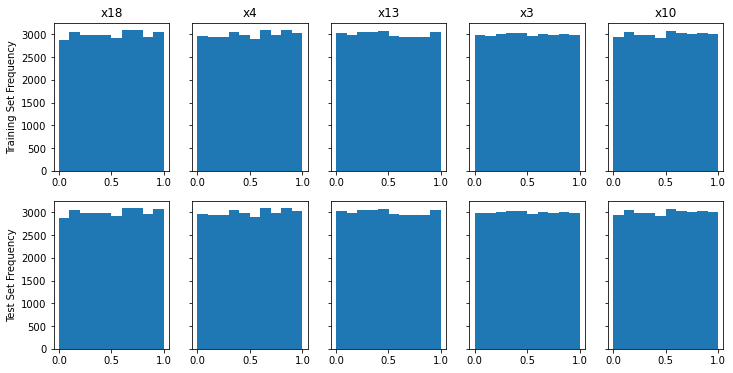

Training Set Feature Correlation Matrix (should be 1 along diagonal, and close to 0 elsewhere)


,x18,x4,x13,x3,x10
x18,1.000000,-0.000104,-0.000618,-0.001312,0.001458
x4,-0.000104,1.000000,-0.003233,0.003706,-0.006039
x13,-0.000618,-0.003233,1.000000,0.001461,0.003253
x3,-0.001312,0.003706,0.001461,1.000000,0.009507
x10,0.001458,-0.006039,0.003253,0.009507,1.000000



Test Set Feature Correlation Matrix (should be 1 along diagonal, and close to 0 elsewhere)


,x18,x4,x13,x3,x10
x18,1.000000,0.011800,0.016943,0.007929,-0.015260
x4,0.011800,1.000000,-0.002926,-0.019683,-0.008313
x13,0.016943,-0.002926,1.000000,-0.010425,0.002989
x3,0.007929,-0.019683,-0.010425,1.000000,-0.019526
x10,-0.015260,-0.008313,0.002989,-0.019526,1.000000


Y0 = 2*x1-1?  False
All tau are 0? True


In [7]:
# Choose 2 samples of simD to test
Dsamps = random.sample(list(np.arange(1,31,1)), n_samps)

for samp in Dsamps:
    print('\nTesting Sample {} of Simulation D'.format(samp))
    
    # Read in test and train
    tr = pd.read_parquet(base_repo_dir / 'data' / 'simD' / 'samp{}_train.parquet'.format(samp))
    te = pd.read_parquet(base_repo_dir / 'data' / 'simD' / 'samp{}_test.parquet'.format(samp))

    #Choose 5 X features to test
    xfeats = random.sample(list(np.arange(1,21,1)), n_xfeats)
    print('Visually check that x{}, x{}, x{}, x{}, and x{} are approximately uniform...'.format(*xfeats))
    
    fig, ax = plt.subplots(2,n_xfeats, figsize=(12,6), sharey=True)
    for i, x in enumerate(xfeats):
        ax[0][i].hist(tr['x'+str(x)])
        ax[1][i].hist(tr['x'+str(x)])
        ax[0][i].set_title('x'+str(x))
    ax[0][0].set_ylabel('Training Set Frequency')
    ax[1][0].set_ylabel('Test Set Frequency')
    plt.show()
    
    feat_list = ['x'+str(x) for x in xfeats]
    
    print('Training Set Feature Correlation Matrix (should be 1 along diagonal, and close to 0 elsewhere)')
    display(pd.DataFrame(np.corrcoef(tr.values.T[xfeats]),
                         index = feat_list, 
                         columns = feat_list))
    
    print('\nTest Set Feature Correlation Matrix (should be 1 along diagonal, and close to 0 elsewhere)')
    display(pd.DataFrame(np.corrcoef(te.values.T[xfeats]),
                         index = feat_list, 
                         columns = feat_list))
    
    
    # Get potential outcomes
    tr = get_potential_outcomes(tr)
    te = get_potential_outcomes(te)
    
    print('Y0 = 2*x1-1? ', all(np.isclose(tr.y0, 2*tr.x1-1)) & all(np.isclose(te.y0, 2*te.x1-1)))
    
    print('All tau are 0?', (all(tr.tau==0)&all(te.tau==0)))


#### Failed to confirm that Y0 is a linear transformation of x1. All other checks passed.

## Sim E


Testing Sample 27 of Simulation E
Visually check that x20, x12, x7, x3, and x2 are approximately uniform...


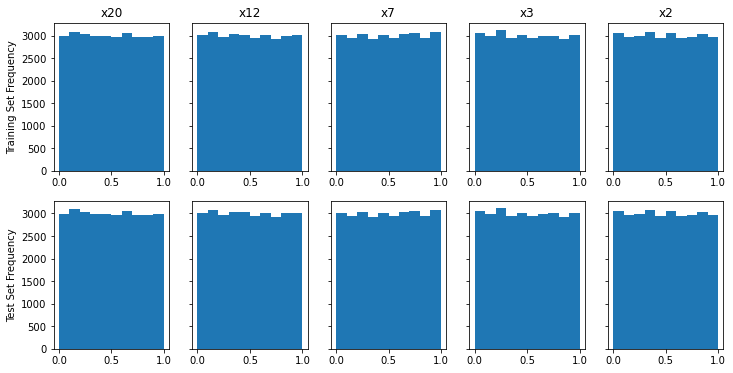

Training Set Feature Correlation Matrix (should be 1 along diagonal, and close to 0 elsewhere)


,x20,x12,x7,x3,x2
x20,1.000000,-0.005061,-0.008596,-0.005045,-0.000798
x12,-0.005061,1.000000,-0.001626,-0.001190,-0.005855
x7,-0.008596,-0.001626,1.000000,-0.011282,0.007045
x3,-0.005045,-0.001190,-0.011282,1.000000,-0.007901
x2,-0.000798,-0.005855,0.007045,-0.007901,1.000000



Test Set Feature Correlation Matrix (should be 1 along diagonal, and close to 0 elsewhere)


,x20,x12,x7,x3,x2
x20,1.000000,0.000266,-0.004459,-0.024832,0.002228
x12,0.000266,1.000000,0.014765,-0.007883,-0.009244
x7,-0.004459,0.014765,1.000000,0.016265,-0.008105
x3,-0.024832,-0.007883,0.016265,1.000000,-0.011153
x2,0.002228,-0.009244,-0.008105,-0.011153,1.000000


Y0 = 2*x1-1?  False
Wherever x2>0.1, tau=8?  True
Wherever x2<=0.1, tau=0?  True

Testing Sample 21 of Simulation E
Visually check that x8, x10, x3, x20, and x4 are approximately uniform...


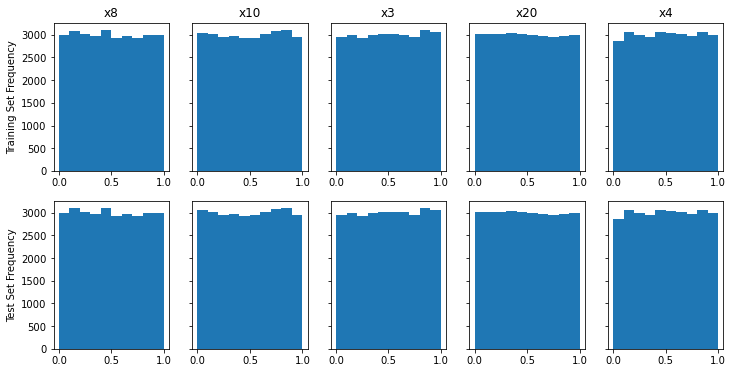

Training Set Feature Correlation Matrix (should be 1 along diagonal, and close to 0 elsewhere)


,x8,x10,x3,x20,x4
x8,1.000000,0.008112,-0.000160,-0.005654,0.001653
x10,0.008112,1.000000,-0.002341,-0.000708,0.001902
x3,-0.000160,-0.002341,1.000000,-0.002367,0.005014
x20,-0.005654,-0.000708,-0.002367,1.000000,-0.001790
x4,0.001653,0.001902,0.005014,-0.001790,1.000000



Test Set Feature Correlation Matrix (should be 1 along diagonal, and close to 0 elsewhere)


,x8,x10,x3,x20,x4
x8,1.000000,-0.000059,0.007324,-0.002790,0.011549
x10,-0.000059,1.000000,0.003428,-0.001765,-0.009246
x3,0.007324,0.003428,1.000000,0.008079,0.008770
x20,-0.002790,-0.001765,0.008079,1.000000,0.014589
x4,0.011549,-0.009246,0.008770,0.014589,1.000000


Y0 = 2*x1-1?  False
Wherever x2>0.1, tau=8?  True
Wherever x2<=0.1, tau=0?  True


In [8]:
# Choose 2 samples of simE to test
Esamps = random.sample(list(np.arange(1,31,1)), n_samps)

for samp in Esamps:
    print('\nTesting Sample {} of Simulation E'.format(samp))
    
    # Read in test and train
    tr = pd.read_parquet(base_repo_dir / 'data' / 'simE' / 'samp{}_train.parquet'.format(samp))
    te = pd.read_parquet(base_repo_dir / 'data' / 'simE' / 'samp{}_test.parquet'.format(samp))

    #Choose 5 X features to test
    xfeats = random.sample(list(np.arange(1,21,1)), n_xfeats)
    print('Visually check that x{}, x{}, x{}, x{}, and x{} are approximately uniform...'.format(*xfeats))
    
    fig, ax = plt.subplots(2,n_xfeats, figsize=(12,6), sharey=True)
    for i, x in enumerate(xfeats):
        ax[0][i].hist(tr['x'+str(x)])
        ax[1][i].hist(tr['x'+str(x)])
        ax[0][i].set_title('x'+str(x))
    ax[0][0].set_ylabel('Training Set Frequency')
    ax[1][0].set_ylabel('Test Set Frequency')
    plt.show()
    
    feat_list = ['x'+str(x) for x in xfeats]
    
    print('Training Set Feature Correlation Matrix (should be 1 along diagonal, and close to 0 elsewhere)')
    display(pd.DataFrame(np.corrcoef(tr.values.T[xfeats]),
                         index = feat_list, 
                         columns = feat_list))
    
    print('\nTest Set Feature Correlation Matrix (should be 1 along diagonal, and close to 0 elsewhere)')
    display(pd.DataFrame(np.corrcoef(te.values.T[xfeats]),
                         index = feat_list, 
                         columns = feat_list))
    
    
    # Get potential outcomes
    tr = get_potential_outcomes(tr)
    te = get_potential_outcomes(te)
    
    print('Y0 = 2*x1-1? ', all(np.isclose(tr.y0, 2*tr.x1-1)) & all(np.isclose(te.y0, 2*te.x1-1)))
    
    
    print('Wherever x2>0.1, tau=8? ', all(np.isclose(tr[tr.x2>0.1]['tau'],8)) \
                                    & all(np.isclose(te[te.x2>0.1]['tau'],8)))
    print('Wherever x2<=0.1, tau=0? ', all(np.isclose(tr[tr.x2<=0.1]['tau'],0)) \
                                    & all(np.isclose(te[te.x2<=0.1]['tau'],0)))


#### Failed to confirm that Y0 is a linear transformation of x1. All other checks passed.

## Sim F


Testing Sample 13 of Simulation F
Visually check that x15, x12, x6, x19, and x17 are approximately uniform...


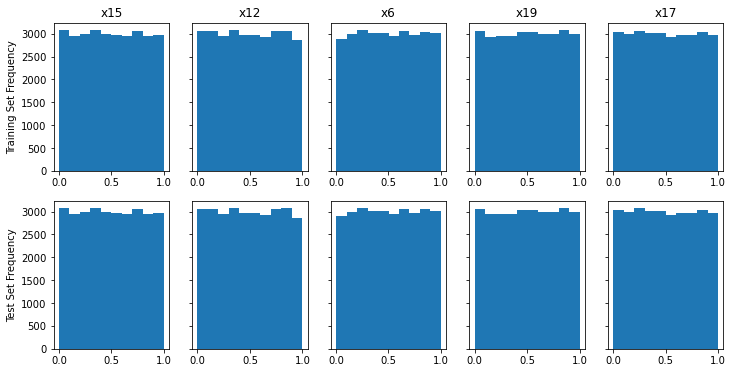

Training Set Feature Correlation Matrix (should be 1 along diagonal, and close to 0 elsewhere)


,x15,x12,x6,x19,x17
x15,1.000000,-0.007353,-0.013003,-0.003528,0.002426
x12,-0.007353,1.000000,-0.000609,-0.000767,0.002886
x6,-0.013003,-0.000609,1.000000,-0.003528,-0.000318
x19,-0.003528,-0.000767,-0.003528,1.000000,0.013465
x17,0.002426,0.002886,-0.000318,0.013465,1.000000



Test Set Feature Correlation Matrix (should be 1 along diagonal, and close to 0 elsewhere)


,x15,x12,x6,x19,x17
x15,1.000000,-0.003521,0.003913,-0.014040,-0.019463
x12,-0.003521,1.000000,0.005730,-0.004912,0.011425
x6,0.003913,0.005730,1.000000,-0.019915,0.004068
x19,-0.014040,-0.004912,-0.019915,1.000000,-0.000235
x17,-0.019463,0.011425,0.004068,-0.000235,1.000000


Y0 = 2*x1-1?  False
Wherever x2>0.1, tau=4*pscore+7?  True
Wherever x2<=0.1, tau=4*pscore-1?  True

Testing Sample 9 of Simulation F
Visually check that x7, x9, x3, x6, and x8 are approximately uniform...


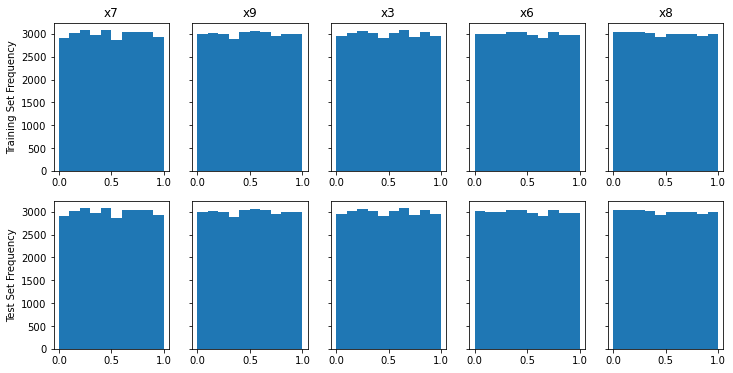

Training Set Feature Correlation Matrix (should be 1 along diagonal, and close to 0 elsewhere)


,x7,x9,x3,x6,x8
x7,1.000000,-0.002614,-0.003040,-0.003795,0.010753
x9,-0.002614,1.000000,0.000249,0.002897,0.010172
x3,-0.003040,0.000249,1.000000,0.001676,-0.009713
x6,-0.003795,0.002897,0.001676,1.000000,-0.002784
x8,0.010753,0.010172,-0.009713,-0.002784,1.000000



Test Set Feature Correlation Matrix (should be 1 along diagonal, and close to 0 elsewhere)


,x7,x9,x3,x6,x8
x7,1.000000,-0.005519,-0.021099,0.013686,-0.003776
x9,-0.005519,1.000000,-0.014226,0.010159,-0.010510
x3,-0.021099,-0.014226,1.000000,-0.004677,-0.004433
x6,0.013686,0.010159,-0.004677,1.000000,-0.009714
x8,-0.003776,-0.010510,-0.004433,-0.009714,1.000000


Y0 = 2*x1-1?  False
Wherever x2>0.1, tau=4*pscore+7?  True
Wherever x2<=0.1, tau=4*pscore-1?  True


In [9]:
# Choose 2 samples of simF to test
Fsamps = random.sample(list(np.arange(1,31,1)), n_samps)

for samp in Fsamps:
    print('\nTesting Sample {} of Simulation F'.format(samp))
    
    # Read in test and train
    tr = pd.read_parquet(base_repo_dir / 'data' / 'simF' / 'samp{}_train.parquet'.format(samp))
    te = pd.read_parquet(base_repo_dir / 'data' / 'simF' / 'samp{}_test.parquet'.format(samp))

    #Choose 5 X features to test
    xfeats = random.sample(list(np.arange(1,21,1)), n_xfeats)
    print('Visually check that x{}, x{}, x{}, x{}, and x{} are approximately uniform...'.format(*xfeats))
    
    fig, ax = plt.subplots(2,n_xfeats, figsize=(12,6), sharey=True)
    for i, x in enumerate(xfeats):
        ax[0][i].hist(tr['x'+str(x)])
        ax[1][i].hist(tr['x'+str(x)])
        ax[0][i].set_title('x'+str(x))
    ax[0][0].set_ylabel('Training Set Frequency')
    ax[1][0].set_ylabel('Test Set Frequency')
    plt.show()
    
    feat_list = ['x'+str(x) for x in xfeats]
    
    print('Training Set Feature Correlation Matrix (should be 1 along diagonal, and close to 0 elsewhere)')
    display(pd.DataFrame(np.corrcoef(tr.values.T[xfeats]),
                         index = feat_list, 
                         columns = feat_list))
    
    print('\nTest Set Feature Correlation Matrix (should be 1 along diagonal, and close to 0 elsewhere)')
    display(pd.DataFrame(np.corrcoef(te.values.T[xfeats]),
                         index = feat_list, 
                         columns = feat_list))
    
    
    # Get potential outcomes
    tr = get_potential_outcomes(tr)
    te = get_potential_outcomes(te)
    
    print('Y0 = 2*x1-1? ', all(np.isclose(tr.y0, 2*tr.x1-1)) & all(np.isclose(te.y0, 2*te.x1-1)))
    
    
    print('Wherever x2>0.1, tau=4*pscore+7? ', all(np.isclose(tr[tr.x2>0.1]['tau'],\
                                                                 4*tr[tr.x2>0.1]['pscore']+7)) \
                                                 & all(np.isclose(te[te.x2>0.1]['tau'],\
                                                                 4*te[te.x2>0.1]['pscore']+7)))
    print('Wherever x2<=0.1, tau=4*pscore-1? ', all(np.isclose(tr[tr.x2<=0.1]['tau'],\
                                                                 4*tr[tr.x2<=0.1]['pscore']-1)) \
                                                 & all(np.isclose(te[te.x2<=0.1]['tau'],\
                                                                 4*te[te.x2<=0.1]['pscore']-1)))


#### Failed to confirm that Y0 is a linear transformation of x1. All other checks passed.